In [16]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic

In [17]:
# cap = cv2.VideoCapture(1)
# with mp_holistics.Holistic(
#     min_detection_confidence=0.8,
#     min_tracking_confidence=0.8
# ) as holistic:
#     while cap.isOpened():
#         success,image=cap.read()
#         cv2.imshow('Webcam', image)
#         if not success:
#             print('Ignoring empty frames')
#             continue
#         image.flags.writeable = False
#         # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

#         print(result)
#         break
# cap.release()


In [44]:
# For webcam input:
cap = cv2.VideoCapture(1)
with mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = holistic.process(image)

    # # Draw landmark annotation on the image.
    # image.flags.writeable = True
    # image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    # mp_drawing.draw_landmarks(
    #     image,
    #     results.face_landmarks,
    #     mp_holistic.FACEMESH_CONTOURS,
    #     landmark_drawing_spec=None,
    #     connection_drawing_spec=mp_drawing_styles
    #     .get_default_face_mesh_contours_style())
    # mp_drawing.draw_landmarks(
    #     image,
    #     results.pose_landmarks,
    #     mp_holistic.POSE_CONNECTIONS,
    #     landmark_drawing_spec=mp_drawing_styles
    #     .get_default_pose_landmarks_style())
    # # Flip the image horizontally for a selfie-view display.
    # cv2.imshow('MediaPipe Holistic', cv2.flip(image, 1))
    # if cv2.waitKey(5) & 0xFF == 27:
    break
cap.release()


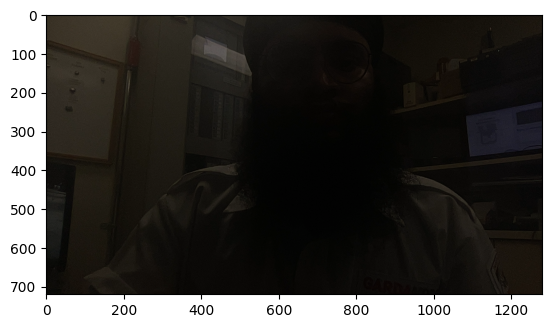

In [45]:
import matplotlib.pyplot as plt
plt.imshow(image)